# Week 6

Phew. Is it week 6 already? 

Last week we had an intro to machine learning and regression and this week we continue with some more ML but focusing on classification instead. There are lots of courses on machine learning at DTU. And across many research areas, people use ML for all kinds of things. So there's a good chance you're already familiar with what's going to happen today. 

In the following, we continue introducing fundamentals of ML, decision trees and start with some prediction tasks on crime data. You might ask, why are we doing this? Well, a couple of reasons:

1. It ties nicely with how we started this course: do you remember all we learnt about predictive policing in Week 1? So, today it is our turn to make predictions and see how well we can do with the data we have been exploring.

2. Visualization **AND** machine learning is a powerful combination. A combination that is pretty rare. 
  - Usually it's the case that people are either good at machine learning or data viz, but not both. 
  - So what we will be able to do in this class is an unusual combo: We can use ML to understand data and then visualize the outputs of the machine-learning.
    
The plan for today is as follows:

1. In part 1, we go more in depth on fundamentals of machine learning;
2. In part 2, we get an introduction to Decision Trees;
3. In part 3, we put everything together to predict criminal recidivism.

## Part 1: Fundamentals of machine learning 

We continue with a couple of lectures from Ole Winter about model selection and feature extraction. These connect nicely with what you should have already read in DSFS Chaper 11. If you did not read the chater yet, it is time for you to do it. 

Find it on DTU Learn under 'Course content' $\rightarrow$ 'Content' $\rightarrow$ 'Lecture 6 reading' 

**Model selection**
[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/MHhlAtw3Ces/0.jpg)](https://www.youtube.com/watch?v=MHhlAtw3Ces)

**Feature extraction and selection**
[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/RZmitKn220Q/0.jpg)](https://www.youtube.com/watch?v=RZmitKn220Q)

> *Exercise 1*: A few questions about machine learning to see whether you've read the text and watched the videos. 
>
> * What do we mean by a 'feature' in a machine learning model?

Variable

> * What is the main problem with overfitting?

Poor generalization.

> * Explain the connection between the bias-variance trade-off and overfitting/underfitting.

By introducing some bias we can often reduce the variance of the model fit, resulting in less overfitting and thus better generalization.

> * The `Luke is for leukemia` on page 145 in the reading is a great example of why accuracy is not a good measure in very unbalanced problems. Try to come up with a similar example based on a different type of data (either one you are interested in or one related to the SF crime dataset).

With diabetes optimal control, it's not sufficient to give a non-lethal dose 99 % of the time.


## Part 2: Decision Tree Intro

Now we turn to decision trees. This is a fantastically useful supervised machine-learning method, that we use all the time in research. To get started on the decision trees, we asked you to read DSFS, chapter 17 (if you didn't read it you can find it in DTU Learn). 

And our little session on decision trees wouldn't be complete without hearing from Ole about these things. 

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/LAA_CnkAEx8/0.jpg)](https://www.youtube.com/watch?v=LAA_CnkAEx8)

> *Exercise 2:* Just a few questions to make sure you've read the text (DSFS chapter 17) and/or watched the video.
> 
> * There are two main kinds of decision trees depending on the type of output (numeric vs. categorical). What are they?
> * Explain in your own words: Why is entropy useful when deciding where to split the data?

Making leafs as diverse as possible

> * Why are trees prone to overfitting?

In the end, the prediction is an (maybe average) exact value from exisiting data.

> * Explain (in your own words) how random forests help prevent overfitting.

Normal trees have a very high variance since a small change in x can result in completely different predictions of y. Random Forests mitigate this issue by being an ensemble of weak learners focusing on different features.

In the following I added some additional material for you to explore decision trees through some fantastic *visual* introductions. 

*Decision Trees 1*: The visual introduction to decision trees on this webpage is AMAZING. Take a look to get an intuitive feel for how trees work. Do not miss this one, it's a treat! http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

*Decision Trees 2*: the second part of the visual introduction is about the topic of model selection, and bias/variance tradeoffs that we looked into earlier during this lesson. But once again, here those topics are visualized in a fantastic and inspiring way, that will make it stick in your brain better. So check it out http://www.r2d3.us/visual-intro-to-machine-learning-part-2/



*Decision tree tutorials*: And of course the best way to learn how to get this stuff rolling in practice, is to work through a tutorial or two. We recommend the ones below:
  * https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html
  * https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 (this one also has good considerations regarding the one-hot encodings)
  
(But there are many other good ones out there.)

## Part 3: Predicting criminal recidivism

It is now time to put everything together and use the models we have read about for prediction. Today, we are still going to focus on crimes, but with a different dataset. 

The dataset is related to an algorithm used by judges and parole officers for scoring criminal defendant’s likelihood of reoffending (recidivism). It consists of information about defendants and variables used to measure recidivism. 

I'll provide you with more information about this data and its source next week. But, for now I don't want to give you more spoilers (you'll know why next week 😇), so let's get started. In the next exercises, we will try to **loosely** recreate the algorithm to predict whether a person is going to re-commit a crime in the future.

> *Exercise 3.1:* Getting the data ready. Before getting to predictions, we need to get the data, select the features, and define the target. Follow these steps for success:
>
> * Download the dataset from [GitHub](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/recidivism_dataset_sub.csv) and load it in a `pandas` dataframe.
> * Select the variables of interest. Here, a description of which one and their meaning:
>    1. `age`: age (in years) of the person,;
>    2. `sex`: either "Female" or "Male";
>    3. `race`: a variable encoding the race of the person;
>    4. `juv_fel_count`: the number of previous juvenile felonies;
>    5. `juv_misd_count`: the number of previous juvenile misdemeanors;
>    6. `juv_other_count`: the number of prior juvenile convictions that are not considered either felonies or misdemeanors;
>    7. `priors_count`: the number of prior crimes committed;
>    8. `is_recid`: if the defendent has recommit a crime;
>    9. `days_b_screening_arrest`: Days between the arrest and COMPAS screening.
>    9. `c_charge_degree`: Degree of the crime. It is either M (Misdemeanor), F (Felony), or O (not causing jail)
>
> * Finally, we need a target:
>    * `two_year_recid` is what we want to predict. Its current values are $\in\left[0,1\right]$, where $0$ means the defendant did not recommit a crime within two years, and $1$ means the defendant recommitted a crime within two years.

In [10]:
#### My answer
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
sns.set_theme()

url = 'https://raw.githubusercontent.com/suneman/socialdata2022/main/files/recidivism_dataset_sub.csv'
Xvar = ['age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'is_recid', 'days_b_screening_arrest','c_charge_degree']
yvar = ['two_year_recid']

Dfull = pd.read_csv(url)  # OMG :)) !
D = Dfull[Xvar + yvar]
D.shape

(7214, 11)

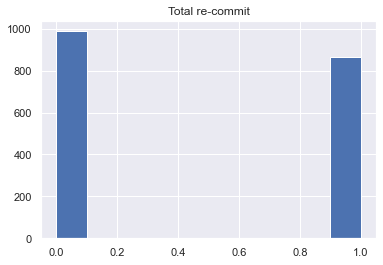

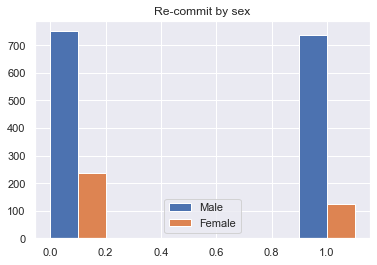

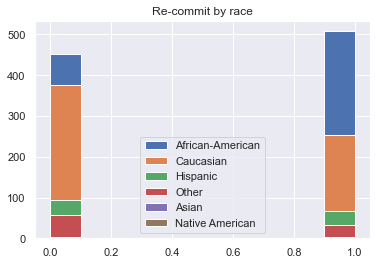

In [11]:
# Clean data
D = D[D['is_recid'] != -1]
D = D[D['c_charge_degree'] != 'O']
D = D[ (D['days_b_screening_arrest'] <= 30) & (D['days_b_screening_arrest'] >= -30)]
Dc = D.drop(columns=['is_recid', 'c_charge_degree', 'days_b_screening_arrest'])

# Split data
X = Dc.drop(columns = yvar)
y = Dc[yvar]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.7, random_state=42)

# Visualise
plt.hist(ytrain) # Fairly balanced. y=1 is recomit
plt.title("Total re-commit")

plt.figure()
plt.hist(ytrain[Xtrain.sex == 'Male'])
plt.hist(ytrain[Xtrain.sex == 'Female']+0.1) # Less frequent to re-commit crimes for females
plt.title("Re-commit by sex")
plt.legend(["Male", "Female"])

plt.figure()
plt.title("Re-commit by race")
[plt.hist(ytrain[Xtrain.race == race]) for race in Xtrain.race.unique()]
plt.legend(Xtrain.race.unique())
# Clearly, African-Americans are (emprically) much more likely to re-commit a crime. This is opposite for "Other"


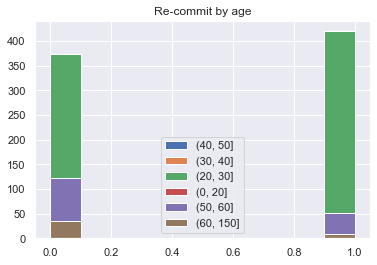

In [12]:
# Re-commit per age group
agegroup = pd.cut(Xtrain.age, bins=[0,20,30,40,50,60,150], right=True)
plt.figure()
plt.title("Re-commit by age")
[plt.hist(ytrain[agegroup == group]) for group in agegroup.unique()]
plt.legend(agegroup.unique())

Ah! Bemærk, at at søjlerne ikke er additive men OVENI i hinaden, dvs. i gruppen (20, 30] er der 375 for y=0, i gruppen (50, 60] er der 120 i gruppen y=0.

Alright, we now have the data, but we still need a bit of **preprocessing** before we can get to the actual prediction.

At the beginning, I wanted you to embed everything into a unique pipeline. I later found that it sometimes have issues (throw errors, takes long time when cross-validating, etc.). Thus, I have excluded this step from today's class. However, if you want to know more about pipelines, here, a nice optional tutorial for you:

* https://towardsdatascience.com/step-by-step-tutorial-of-sci-kit-learn-pipeline-62402d5629b6

> *Exercise 3.2:* Data preprocessing and label encoding. 
>
> * To preprocess the data follow these steps:
>    * filter out records where the `is_recid` feature is not known (i.e. where it is equal to -1); 
>    * only keep records that cause jail time;
>    * only keep records that have between $-30$ and $30$ days between the arrest and screening.
>    * Finally, drop `is_recid`, `c_charge_degree`, `days_b_screening_arrest` for the upcoming analysis.
> * Before we move on, let's explore the data with a few visualizations. Use the variable `two_year_recid` and create a plot with the following subplots: 
>     * A bar plot with the number of recommitted and non-recommitted crimes. What is the fraction of recommitted crimes over the total number of records? Is it balanced?
>     * A bar plot with the fraction of recidivism per `sex`. What do you observe? 
>     * A bar plot with the fraction of recidivism per `race`. What do you observe?
>     * A bar plot with the fraction of recidivism per `age` group (group ages as <20, 20-30, 30-40, etc.). What do you observe?
> * Some features we are working with are categorical, so we need to deal with them by using encoders. There are many different types, but we will focus on the `OneHotEncoder` and the `LabelEncoder`:
>    * Describe what these encoder do and choose one. Which one did you choose? Why?
>    * What variables need to be transformed? 

- I believe this is unnecessary, since Decision Trees / Random Forest CAN handle categorical variables (inherently one-hot-encoding them, but when doing it inherently, categorical variables are kept from being overrepresented when randomly subsetting them for the Random Forest)

We are almost there! It is now time to make predictions.

> *Exercise 3.3:* Build a Decision Tree or a Random Forest. Now we are going to build a Decision Tree (or a Random Forest) classifier that takes as input the features defined above and predicts if a person is going to recommit the crime within two years.
> * Split the data in Train/Test sets. You can do this with `train_test_split` in `sklearn`, I used a 70/30 split, but you are free to try different ones. 
>     * **Note:** create a balanced dataset, that is, **grab an equal number of examples** from each target value.
>    * Fit a model to your Train set. A good option is the  `DecisionTreeClassifier` (or even better a [Random Forest](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html), here is [another tutorial for Random Forests](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)).
> * Evaluate the performance of model on the test set (look at Accuracy, Precision, and Recall). What are your thoughts on these metrics? Is accuracy a good measure?
>    * **hint:** Since you have created a balanced dataset, the baseline performance (random guess) is 50%. 
> * Are your results tied to the specific training data/hyperparameter set you used? Try to perform a `RandomizedSearchCV` and recompute the performance metric above with the hyperparameters found. [Here](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74) a nice tutorial for you! And here one on [cross-validation](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f) for those of you who crave for more.
> * Visualize the tree. There are different options to do so. The easiest one is to use `plot_tree`, but there are other [options](https://mljar.com/blog/visualize-decision-tree/). If you chose Random Forest, you can visualize a tree as well by extracting a single tree with `model.estimators_[n]` (n is the index of the estimator you want to select).
> * Visualize the Feature Importance. What do you observe?
> * **(Optional)** If you find yourself with extra time, come back to this exercise and tweak the encoder, model, and variables you use to see if you can improve the performance of the tree. **Note**: It's not 100% given that adding variables will improve your predictive performance.

Before you go, please, have a look at the following two activities:

> Since the dataset is quite balanced, I will NOT "grab en equal number of examples from each target value" but utilize all the data.

In [13]:
Xtrain

,age,sex,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count
3220,47,Male,African-American,0,0,0,3
332,36,Female,African-American,0,0,0,0
1225,28,Female,Caucasian,0,0,0,1
1448,27,Female,African-American,0,0,0,1
1193,20,Male,African-American,0,0,0,0
...,...,...,...,...,...,...,...
4413,20,Male,Caucasian,1,0,0,1
6063,35,Male,African-American,0,0,0,1
6101,37,Male,Hispanic,0,0,0,3
6295,23,Female,Caucasian,0,0,0,0


In [14]:
# Preprocess
def OneHotty(X):
    X['sex'] = pd.get_dummies(X['sex'], drop_first=True) # Assume Female 
    X = X.join(pd.get_dummies(X['race'],drop_first=True)) # Assume Afro-American
    X = X.drop(columns=['race'])
    return(X)

Xtrain = OneHotty(Xtrain)
Xtest  = OneHotty(Xtest)

In [16]:
clf = RandomForestClassifier()
clf.fit(Xtrain, ytrain.values.ravel())
print(f'Train accuracy: {clf.score(Xtrain, ytrain)}')
print(f'Test accuracy: {clf.score(Xtest, ytest)}')
print(f'___________________________________ \nBaseline guessing: {np.max([ytrain.mean().values, (1-ytrain.mean()).values])}')


Train accuracy: 0.8687196110210696
Test accuracy: 0.6276324924785929
___________________________________ 
Baseline guessing: 0.5337655321447866


In [20]:
from joblib import dump, load
dump(clf, 'RFHelloWorld.joblib')

['RFHelloWorld.joblib']

# XGBoost :-)

In [17]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(Xtrain, ytrain.values.ravel())
print(f'Train accuracy: {xgb.score(Xtrain, ytrain)}')
print(f'Test accuracy: {xgb.score(Xtest, ytest)}')
print(f'___________________________________ \nBaseline guessing: {np.max([ytrain.mean().values, (1-ytrain.mean()).values])}')



[10:22:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy: 0.7968665586169638
Test accuracy: 0.6496181439481602
___________________________________ 
Baseline guessing: 0.5337655321447866


/opt/homebrew/Caskroom/miniforge/base/envs/cforge_env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoost only slightly better test accuracy on default hyperpars

Ideally: Gridsearch + Nested CV + Pipeline() within folds.

---

1)

<mark> Take a minute (it is really one minute) to fill this [form](https://forms.gle/9RwhFc96na4E2Fmg7). It is really important for me to continue improving and give you better feedbacks. </mark>

---
2)

<mark> Some of you consider this course too easy. So, it's time to spice things up: once you have the best model you could find, go to DTU Learn and submit your code together with your final accuracy/precision/recall scores under DTU-Learn $\rightarrow$ Assignments. I'll make a Leaderboard and we'll see who's gonna win 🥇!!</mark>

**Note 1:** Even if it is in the form of an assignment on DTU Learn it is **not** going to be evaluated. So, take it really as an opportunity to play around with your model and see how well you can do.

**Note 2:** You have time until **Thursday at 23.59** to submit your model/performance score.